In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
train_df = pd.read_csv("insurance_training.csv")
test_df = pd.read_csv("insurance_predict.csv")


In [3]:
train_df.head()


,Occupation.Class,Sex,Age.Class,Education,Marital.Status,Income.Group,Need.help.making.financial.decisions,Do.not.like.to.be.in.debt.at.anytime,Feel.satistifed.when.I.get.a.really.good.deal,Like.to.buy.products.with.prestigious.brand.names,Always.try.to.buy.things.on.sale,Once.find.brand.that.satistifies..don.t.experiment,Confident.will.have.enough.money.to.retire,Have.life.insurance
0,Blue Collar,Male,40-49,Some high school,Married,High,Disagree Slightly,Disagree Slightly,Neither Agree nor Disagree,Agree Slightly,Neither Agree nor Disagree,Agree Slightly,Neither Agree nor Disagree,Yes
1,NaN,Male,13-19,Some high school,Single,High,Disagree Slightly,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree Slightly,No
2,Executives/Professionals,Male,20-29,College,Married,Medium high,Disagree Strongly,Agree Strongly,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree Strongly,Agree Slightly,Agree Strongly,No
3,White Collar,Male,20-29,Primary or less,Single,Medium high,Agree Slightly,Agree Strongly,Disagree Slightly,Neither Agree nor Disagree,Agree Slightly,Disagree Strongly,Agree Slightly,Yes
4,NaN,Female,50-59,Primary or less,Married,Medium high,Agree Slightly,Agree Slightly,Agree Slightly,Neither Agree nor Disagree,Agree Slightly,Neither Agree nor Disagree,Agree Strongly,No


In [4]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))


The number of samples into the train data is 3600.


In [5]:
train_df.isnull().sum()


Occupation.Class                                      1550
Sex                                                      0
Age.Class                                                0
Education                                                0
Marital.Status                                           0
Income.Group                                             0
Need.help.making.financial.decisions                     0
Do.not.like.to.be.in.debt.at.anytime                     0
Feel.satistifed.when.I.get.a.really.good.deal            0
Like.to.buy.products.with.prestigious.brand.names        0
Always.try.to.buy.things.on.sale                         0
Once.find.brand.that.satistifies..don.t.experiment       0
Confident.will.have.enough.money.to.retire               0
Have.life.insurance                                      0
dtype: int64

In [6]:
print('Percent of missing "Occupation.Class" records is %.2f%%' %((train_df['Occupation.Class'].isnull().sum()/36)))
#print (train_df['Occupation.Class'].isnull().sum())

Percent of missing "Occupation.Class" records is 43.00%


In [7]:
train_data = train_df.copy()
train_data["Occupation.Class"].fillna('Executives/Professionals', inplace=True)

In [8]:
train_data.head()


,Occupation.Class,Sex,Age.Class,Education,Marital.Status,Income.Group,Need.help.making.financial.decisions,Do.not.like.to.be.in.debt.at.anytime,Feel.satistifed.when.I.get.a.really.good.deal,Like.to.buy.products.with.prestigious.brand.names,Always.try.to.buy.things.on.sale,Once.find.brand.that.satistifies..don.t.experiment,Confident.will.have.enough.money.to.retire,Have.life.insurance
0,Blue Collar,Male,40-49,Some high school,Married,High,Disagree Slightly,Disagree Slightly,Neither Agree nor Disagree,Agree Slightly,Neither Agree nor Disagree,Agree Slightly,Neither Agree nor Disagree,Yes
1,Executives/Professionals,Male,13-19,Some high school,Single,High,Disagree Slightly,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree Slightly,No
2,Executives/Professionals,Male,20-29,College,Married,Medium high,Disagree Strongly,Agree Strongly,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree Strongly,Agree Slightly,Agree Strongly,No
3,White Collar,Male,20-29,Primary or less,Single,Medium high,Agree Slightly,Agree Strongly,Disagree Slightly,Neither Agree nor Disagree,Agree Slightly,Disagree Strongly,Agree Slightly,Yes
4,Executives/Professionals,Female,50-59,Primary or less,Married,Medium high,Agree Slightly,Agree Slightly,Agree Slightly,Neither Agree nor Disagree,Agree Slightly,Neither Agree nor Disagree,Agree Strongly,No


In [9]:
train_data.isnull().sum()


Occupation.Class                                      0
Sex                                                   0
Age.Class                                             0
Education                                             0
Marital.Status                                        0
Income.Group                                          0
Need.help.making.financial.decisions                  0
Do.not.like.to.be.in.debt.at.anytime                  0
Feel.satistifed.when.I.get.a.really.good.deal         0
Like.to.buy.products.with.prestigious.brand.names     0
Always.try.to.buy.things.on.sale                      0
Once.find.brand.that.satistifies..don.t.experiment    0
Confident.will.have.enough.money.to.retire            0
Have.life.insurance                                   0
dtype: int64

In [10]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Occupation.Class",
                                             "Sex",
                                             "Age.Class",
                                             "Education",
                                             "Marital.Status",
                                             "Income.Group",
                                             "Need.help.making.financial.decisions",
                                             "Do.not.like.to.be.in.debt.at.anytime",
                                             "Feel.satistifed.when.I.get.a.really.good.deal",
                                             "Like.to.buy.products.with.prestigious.brand.names",
                                             "Always.try.to.buy.things.on.sale",
                                             "Once.find.brand.that.satistifies..don.t.experiment",
                                             "Confident.will.have.enough.money.to.retire"])

In [11]:
final_train = training
final_train.head()

,Have.life.insurance,Occupation.Class_Blue Collar,Occupation.Class_Executives/Professionals,Occupation.Class_White Collar,Sex_Female,Sex_Male,Age.Class_13-19,Age.Class_20-29,Age.Class_30-39,Age.Class_40-49,...,Once.find.brand.that.satistifies..don.t.experiment_Agree Slightly,Once.find.brand.that.satistifies..don.t.experiment_Agree Strongly,Once.find.brand.that.satistifies..don.t.experiment_Disagree Slightly,Once.find.brand.that.satistifies..don.t.experiment_Disagree Strongly,Once.find.brand.that.satistifies..don.t.experiment_Neither Agree nor Disagree,Confident.will.have.enough.money.to.retire_Agree Slightly,Confident.will.have.enough.money.to.retire_Agree Strongly,Confident.will.have.enough.money.to.retire_Disagree Slightly,Confident.will.have.enough.money.to.retire_Disagree Strongly,Confident.will.have.enough.money.to.retire_Neither Agree nor Disagree
0,Yes,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,No,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,No,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,Yes,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,No,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [12]:
test_df.head()
#test_df.isnull().sum()


,Occupation.Class,Sex,Age.Class,Education,Marital.Status,Income.Group,Need.help.making.financial.decisions,Do.not.like.to.be.in.debt.at.anytime,Feel.satistifed.when.I.get.a.really.good.deal,Like.to.buy.products.with.prestigious.brand.names,Always.try.to.buy.things.on.sale,Once.find.brand.that.satistifies..don.t.experiment,Confident.will.have.enough.money.to.retire,Have.life.insurance
0,Blue Collar,Female,30-39,Some high school,Married,Medium high,Agree Slightly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Disagree Slightly,NaN
1,Blue Collar,Male,20-29,Some high school,Single,Medium high,Agree Slightly,Agree Strongly,Agree Strongly,Agree Slightly,Agree Slightly,Agree Strongly,Agree Slightly,NaN
2,White Collar,Male,40-49,College,Married,Medium high,Agree Slightly,Agree Slightly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,NaN
3,NaN,Male,13-19,Some high school,Single,High,Neither Agree nor Disagree,Agree Slightly,Disagree Slightly,Disagree Slightly,Disagree Slightly,Neither Agree nor Disagree,Agree Slightly,NaN
4,NaN,Male,60+,Primary or less,Married,High,Disagree Strongly,Agree Strongly,Disagree Strongly,Agree Strongly,Disagree Strongly,Agree Strongly,Agree Strongly,NaN


In [13]:
test_df.head()

,Occupation.Class,Sex,Age.Class,Education,Marital.Status,Income.Group,Need.help.making.financial.decisions,Do.not.like.to.be.in.debt.at.anytime,Feel.satistifed.when.I.get.a.really.good.deal,Like.to.buy.products.with.prestigious.brand.names,Always.try.to.buy.things.on.sale,Once.find.brand.that.satistifies..don.t.experiment,Confident.will.have.enough.money.to.retire,Have.life.insurance
0,Blue Collar,Female,30-39,Some high school,Married,Medium high,Agree Slightly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Disagree Slightly,NaN
1,Blue Collar,Male,20-29,Some high school,Single,Medium high,Agree Slightly,Agree Strongly,Agree Strongly,Agree Slightly,Agree Slightly,Agree Strongly,Agree Slightly,NaN
2,White Collar,Male,40-49,College,Married,Medium high,Agree Slightly,Agree Slightly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,NaN
3,NaN,Male,13-19,Some high school,Single,High,Neither Agree nor Disagree,Agree Slightly,Disagree Slightly,Disagree Slightly,Disagree Slightly,Neither Agree nor Disagree,Agree Slightly,NaN
4,NaN,Male,60+,Primary or less,Married,High,Disagree Strongly,Agree Strongly,Disagree Strongly,Agree Strongly,Disagree Strongly,Agree Strongly,Agree Strongly,NaN


In [14]:
test_data = test_df.copy()
test_data["Occupation.Class"].fillna('Executives/Professionals', inplace=True)

In [15]:
test_data.head()

,Occupation.Class,Sex,Age.Class,Education,Marital.Status,Income.Group,Need.help.making.financial.decisions,Do.not.like.to.be.in.debt.at.anytime,Feel.satistifed.when.I.get.a.really.good.deal,Like.to.buy.products.with.prestigious.brand.names,Always.try.to.buy.things.on.sale,Once.find.brand.that.satistifies..don.t.experiment,Confident.will.have.enough.money.to.retire,Have.life.insurance
0,Blue Collar,Female,30-39,Some high school,Married,Medium high,Agree Slightly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Disagree Slightly,NaN
1,Blue Collar,Male,20-29,Some high school,Single,Medium high,Agree Slightly,Agree Strongly,Agree Strongly,Agree Slightly,Agree Slightly,Agree Strongly,Agree Slightly,NaN
2,White Collar,Male,40-49,College,Married,Medium high,Agree Slightly,Agree Slightly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,NaN
3,Executives/Professionals,Male,13-19,Some high school,Single,High,Neither Agree nor Disagree,Agree Slightly,Disagree Slightly,Disagree Slightly,Disagree Slightly,Neither Agree nor Disagree,Agree Slightly,NaN
4,Executives/Professionals,Male,60+,Primary or less,Married,High,Disagree Strongly,Agree Strongly,Disagree Strongly,Agree Strongly,Disagree Strongly,Agree Strongly,Agree Strongly,NaN


In [16]:
testing=pd.get_dummies(test_data, columns=["Occupation.Class","Sex","Age.Class","Education","Marital.Status",
                                           "Income.Group",
                                           "Need.help.making.financial.decisions",
                                           "Do.not.like.to.be.in.debt.at.anytime",
                                           "Feel.satistifed.when.I.get.a.really.good.deal",
                                           "Like.to.buy.products.with.prestigious.brand.names",
                                           "Always.try.to.buy.things.on.sale",
                                           "Once.find.brand.that.satistifies..don.t.experiment",
                                           "Confident.will.have.enough.money.to.retire"])


final_test = testing
final_test.head()

,Have.life.insurance,Occupation.Class_Blue Collar,Occupation.Class_Executives/Professionals,Occupation.Class_White Collar,Sex_Female,Sex_Male,Age.Class_13-19,Age.Class_20-29,Age.Class_30-39,Age.Class_40-49,...,Once.find.brand.that.satistifies..don.t.experiment_Agree Slightly,Once.find.brand.that.satistifies..don.t.experiment_Agree Strongly,Once.find.brand.that.satistifies..don.t.experiment_Disagree Slightly,Once.find.brand.that.satistifies..don.t.experiment_Disagree Strongly,Once.find.brand.that.satistifies..don.t.experiment_Neither Agree nor Disagree,Confident.will.have.enough.money.to.retire_Agree Slightly,Confident.will.have.enough.money.to.retire_Agree Strongly,Confident.will.have.enough.money.to.retire_Disagree Slightly,Confident.will.have.enough.money.to.retire_Disagree Strongly,Confident.will.have.enough.money.to.retire_Neither Agree nor Disagree
0,NaN,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,NaN,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,NaN,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,NaN,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,NaN,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#cols =  ["Occupation.Class","Sex","Age.Class","Marital.Status","Income.Group","Need.help.making.financial.decisions"
#         ,"Do.not.like.to.be.in.debt.at.anytime","Feel.satistifed.when.I.get.a.really.good.deal",
#         "Like.to.buy.products.with.prestigious.brand.names","Always.try.to.buy.things.on.sale",
#         "Once.find.brand.that.satistifies..don.t.experiment","Confident.will.have.enough.money.to.retire"]

#cols=["Occupation.Class","Sex","Age.Class","Marital.Status","Income.Group","Need.help.making.financial.decisions","Do.not.like.to.be.in.debt.at.anytime","Feel.satistifed.when.I.get.a.really.good.deal","Like.to.buy.products.with.prestigious.brand.names",'Always.try.to.buy.things.on.sale','Once.find.brand.that.satistifies..don.t.experiment',"Confident.will.have.enough.money.to.retire"]
cols = list(final_train)
cols.remove('Have.life.insurance')

#print cols
X = final_train[cols]
y = final_train['Have.life.insurance']
y = pd.Series(np.where(y.values=='Yes',1,0),y.index)
y = y.astype(int)
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model)
#print X.iloc[0,:]
#print y.iloc[0]
rfe = rfe.fit(X, y)

Selected_features = list(X.columns[rfe.support_])

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Occupation.Class_Executives/Professionals', 'Age.Class_13-19', 'Age.Class_20-29', 'Age.Class_40-49', 'Age.Class_50-59', 'Age.Class_60+', 'Education_College', 'Education_Post-graduate', 'Education_Primary or less', 'Education_Some high school', 'Marital.Status_Married', 'Marital.Status_Refused/No answer', 'Marital.Status_Single', 'Marital.Status_Widowed', 'Income.Group_High', 'Income.Group_Low', 'Income.Group_Medium high', 'Income.Group_Medium low', 'Need.help.making.financial.decisions_Agree Strongly', 'Need.help.making.financial.decisions_Disagree Slightly', 'Need.help.making.financial.decisions_Disagree Strongly', 'Need.help.making.financial.decisions_Neither Agree nor Disagree', 'Feel.satistifed.when.I.get.a.really.good.deal_Agree Strongly', 'Feel.satistifed.when.I.get.a.really.good.deal_Disagree Strongly', 'Like.to.buy.products.with.prestigious.brand.names_Disagree Slightly', 'Like.to.buy.products.with.prestigious.brand.names_Disagree Strongly', 'Once.find.bran

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Train/Test split results:
LogisticRegression accuracy is 0.654
LogisticRegression log_loss is 0.626
LogisticRegression auc is 0.701


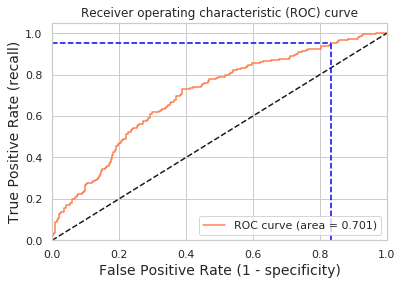

Using a threshold of 0.199 guarantees a sensitivity of 0.951 and a specificity of 0.167, i.e. a false positive rate of 83.33%.


In [19]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [28]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


K-fold cross-validation results:
LogisticRegression average accuracy is 0.647
LogisticRegression average log_loss is 0.625
LogisticRegression average auc is 0.705


best params: LogisticRegression(C=0.20001000000000002, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.20001000000000002}
('best score:', 0.6483333333333333)


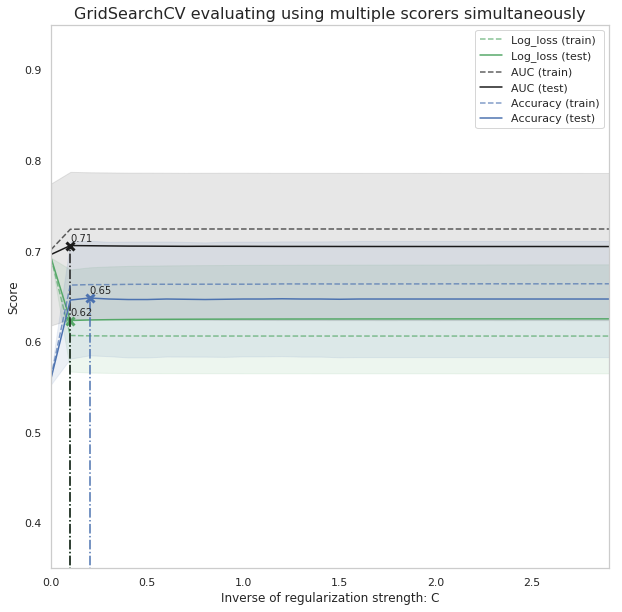

In [29]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

best params: Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=False, with_std=False)), ('clf', LogisticRegression(C=0.60001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
best params: {'clf__C': 0.60001}
('best score:', 0.6542777777777777)


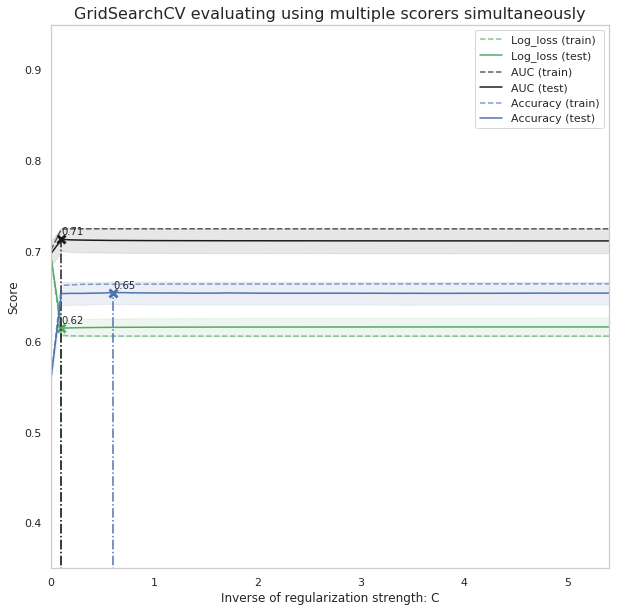

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()


In [32]:


final_test['Have.life.insurance'] = log_clf.predict(final_test[Selected_features])

submission = final_test['Have.life.insurance']
submission = pd.Series(np.where(submission.values==1,"Yes","No"),submission.index)
submission.to_csv("submission.csv", index=False)
submission.tail()

KeyError: "['Marital.Status_Refused/No answer'] not in index"